In [1]:
%matplotlib  inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

/home/uldo/miniconda3/envs/DS/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/uldo/miniconda3/envs/DS/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/uldo/miniconda3/envs/DS/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


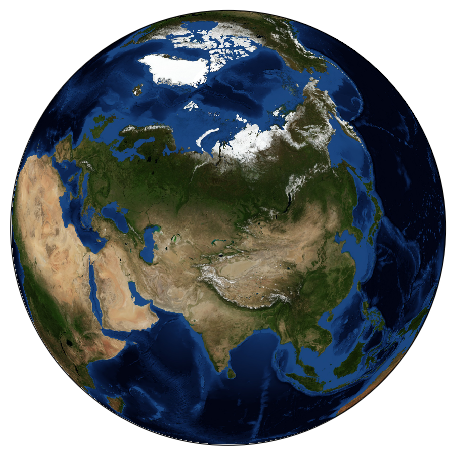

In [3]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=80)
m.bluemarble(scale=0.5)
plt.show()

/home/uldo/miniconda3/envs/DS/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/uldo/miniconda3/envs/DS/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(2.34727e+06,4.51808e+06,'Seattle')

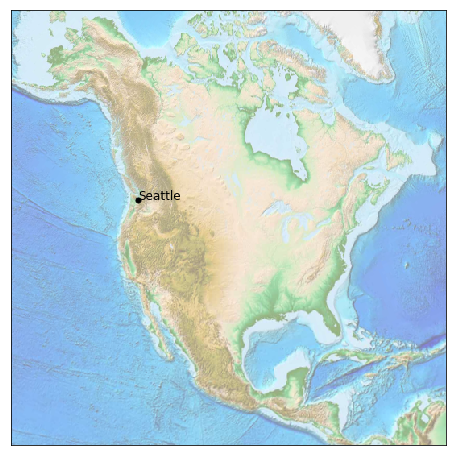

In [5]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(
    projection='lcc',
    resolution=None,
    width=8E6,
    height=8E6,
    lat_0=45,
    lon_0=-100
)
m.etopo(scale=0.5, alpha=0.5)
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Seattle', fontsize=12)